# Predicción de deserción de un empleado

In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Descargar el dataset

handle = 'raminhuseyn/hr-analytics-data-set'

api.dataset_download_files(handle, path='../data/raw', unzip=True)


ModuleNotFoundError: No module named 'kaggle'

In [2]:
import pandas as pd

df = pd.read_csv('../data/raw/HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
import sqlite3

my_connection = sqlite3.connect('../data/raw/hr.db')

my_cursor = my_connection.cursor()

# Crear la tabla
my_cursor.execute('''
CREATE TABLE IF NOT EXISTS hr (
    left INTEGER PRIMARY KEY,
    satisfaction_level REAL,
    last_evaluation REAL,
    number_project INTEGER,
    average_monthly_hours REAL,
    time_spend_company INTEGER,
    Work_accident INTEGER,
    promotion_last_5years INTEGER,
    department TEXT,
    salary TEXT
)
''')
#Ahora vamos a insertar los datos en la tabla
df.to_sql('hr', my_connection, if_exists='replace', index=False)
# Comprobar que se han insertado los datos
my_cursor.execute('SELECT * FROM hr LIMIT 5')
rows = my_cursor.fetchall()
for row in rows:
    print(row)
# Cerrar la conexión
my_connection.close()


(0.38, 0.53, 2, 157, 3, 0, 1, 0, 'sales', 'low')
(0.8, 0.86, 5, 262, 6, 0, 1, 0, 'sales', 'medium')
(0.11, 0.88, 7, 272, 4, 0, 1, 0, 'sales', 'medium')
(0.72, 0.87, 5, 223, 5, 0, 1, 0, 'sales', 'low')
(0.37, 0.52, 2, 159, 3, 0, 1, 0, 'sales', 'low')


In [5]:

# Mapear los valores de la columna 'left'
mapping_left = {1: 'yes', 0: 'no'}
df['left_categorical'] = df['left'].map(mapping_left)

# Mapear los valores de la columna 'Work_accident'
mapping_accident = {1: 'yes', 0: 'no'}
df['Work_accident_categorical'] = df['Work_accident'].map(mapping_accident)

mapping_accident = {1: 'yes', 0: 'no'}
df['promotion_last_5years_categorical'] = df['promotion_last_5years'].map(mapping_accident)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction_level                 14999 non-null  float64
 1   last_evaluation                    14999 non-null  float64
 2   number_project                     14999 non-null  int64  
 3   average_montly_hours               14999 non-null  int64  
 4   time_spend_company                 14999 non-null  int64  
 5   Work_accident                      14999 non-null  int64  
 6   left                               14999 non-null  int64  
 7   promotion_last_5years              14999 non-null  int64  
 8   Department                         14999 non-null  object 
 9   salary                             14999 non-null  object 
 10  left_categorical                   14999 non-null  object 
 11  Work_accident_categorical          14999 non-null  obj

In [7]:
df = df.drop(columns=['left', 'Work_accident','promotion_last_5years'])
df = df.rename(columns={'left_categorical': 'left',
                       'Work_accident_categorical': 'Work_accident',
                       'promotion_last_5years_categorical' : 'promotion_last_5years'})


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Department             14999 non-null  object 
 6   salary                 14999 non-null  object 
 7   left                   14999 non-null  object 
 8   Work_accident          14999 non-null  object 
 9   promotion_last_5years  14999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [9]:
df.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Department,salary,left,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,sales,low,yes,no,no
1,0.80,0.86,5,262,6,sales,medium,yes,no,no
2,0.11,0.88,7,272,4,sales,medium,yes,no,no
3,0.72,0.87,5,223,5,sales,low,yes,no,no
4,0.37,0.52,2,159,3,sales,low,yes,no,no
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,management,high,no,yes,yes
11996,0.74,0.95,5,266,10,management,high,no,no,yes
11997,0.85,0.54,3,185,10,management,high,no,no,yes
11998,0.33,0.65,3,172,10,marketing,high,no,no,yes


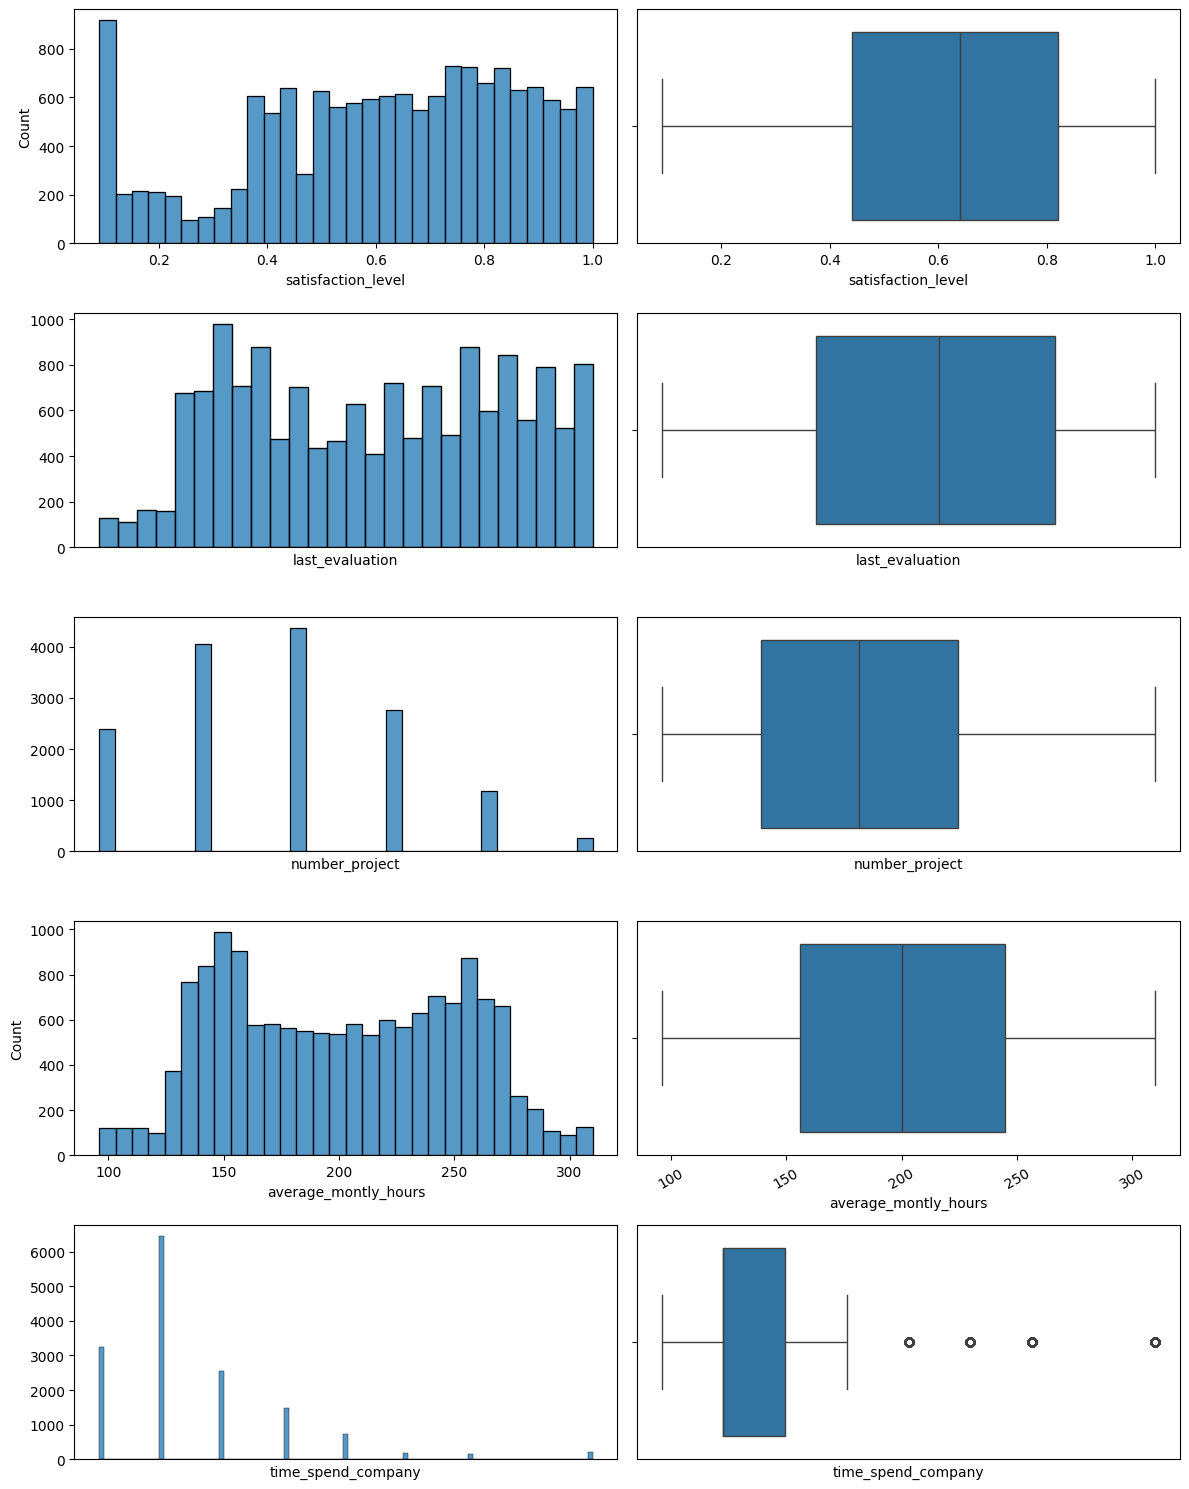

In [10]:
#Analisis univariante Numerico
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 2, figsize=(12, 15)) # Adjusted rows for five variables

sns.histplot(ax=axes[0, 0], data=df, x='satisfaction_level')
sns.boxplot(ax=axes[0, 1], data=df, x='satisfaction_level')

sns.histplot(ax=axes[1, 0], data=df, x='last_evaluation').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[1, 1], data=df, x='last_evaluation').set(ylabel=None, xticks=[])

sns.histplot(ax=axes[2, 0], data=df, x='number_project').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[2, 1], data=df, x='number_project').set(ylabel=None, xticks=[])

sns.histplot(ax=axes[3, 0], data=df, x='average_montly_hours')
sns.boxplot(ax=axes[3, 1], data=df, x='average_montly_hours')
axes[3, 1].tick_params(axis='x', rotation=30) # Rotated x-axis labels

sns.histplot(ax=axes[4, 0], data=df, x='time_spend_company').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[4, 1], data=df, x='time_spend_company').set(ylabel=None, xticks=[])

plt.tight_layout()
plt.show()

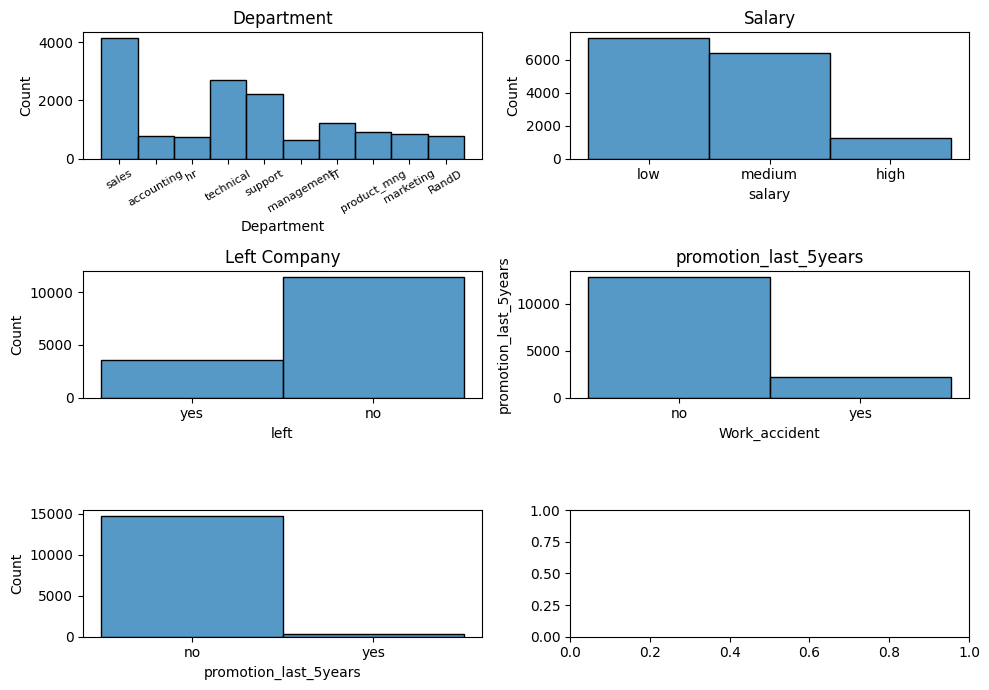

In [11]:
#Analisis univariante Categorico

import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(3, 2, figsize=(10, 7))

# Department
sns.histplot(ax=axes[0, 0], data=df, x='Department')
axes[0, 0].tick_params(axis='x', rotation=30, labelsize=8)
axes[0, 0].set_title('Department')

# Salary
sns.histplot(ax=axes[0, 1], data=df, x='salary')
axes[0, 1].set_title('Salary')

# Left Company (using countplot for categorical data)
sns.histplot(ax=axes[1, 0], data=df, x='left')
axes[1, 0].set_title('Left Company')
axes[1, 0].set_ylabel('Count') # Add a y-axis label

# Work Accident (using countplot for categorical data)
sns.histplot(ax=axes[1, 1], data=df, x='Work_accident')
axes[1, 1].set_title('Work Accident')
axes[1, 1].set_ylabel('Count') # Add a y-axis label

sns.histplot(ax=axes[2,0], data=df, x='promotion_last_5years')
axes[1, 1].set_title('promotion_last_5years')
axes[1, 1].set_ylabel('promotion_last_5years') # Add a y-axis label


plt.tight_layout()
plt.show()

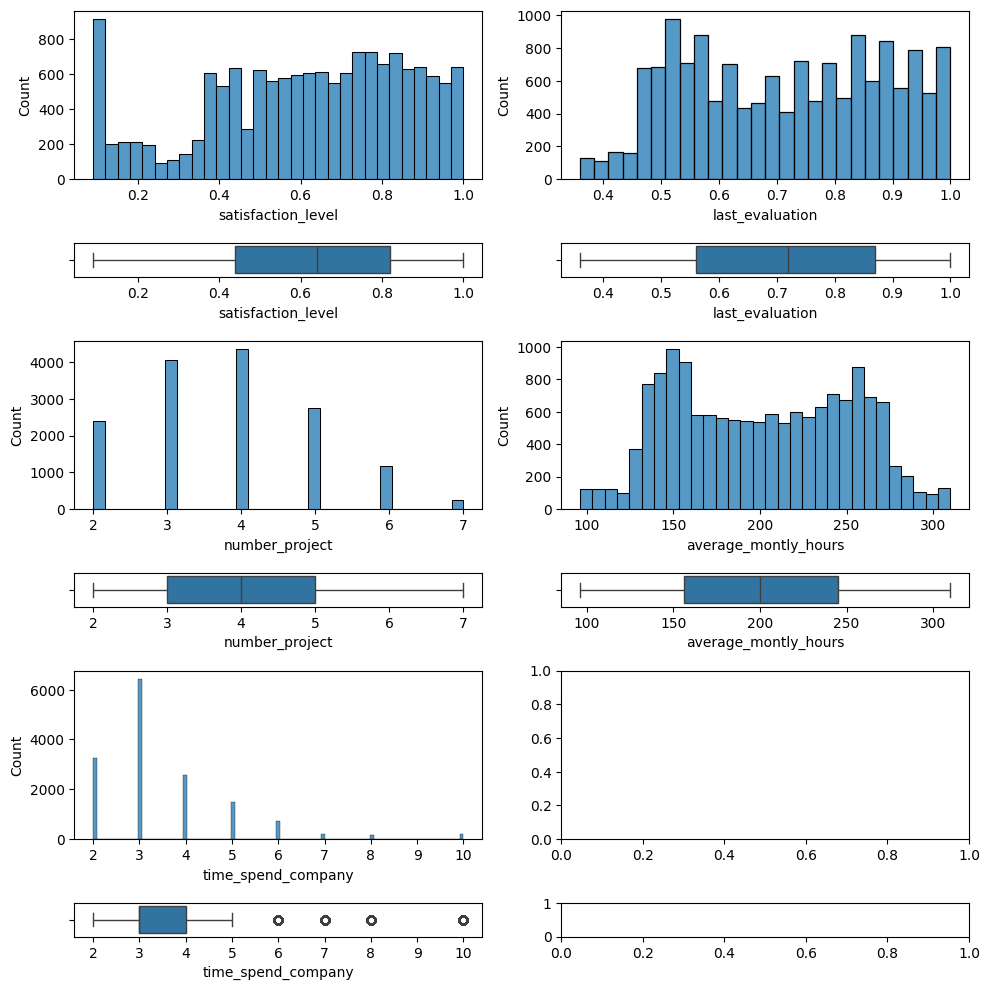

In [12]:
from utils import analisis_numerico_numerico
analisis_numerico_numerico(df, 'satisfaction_level')

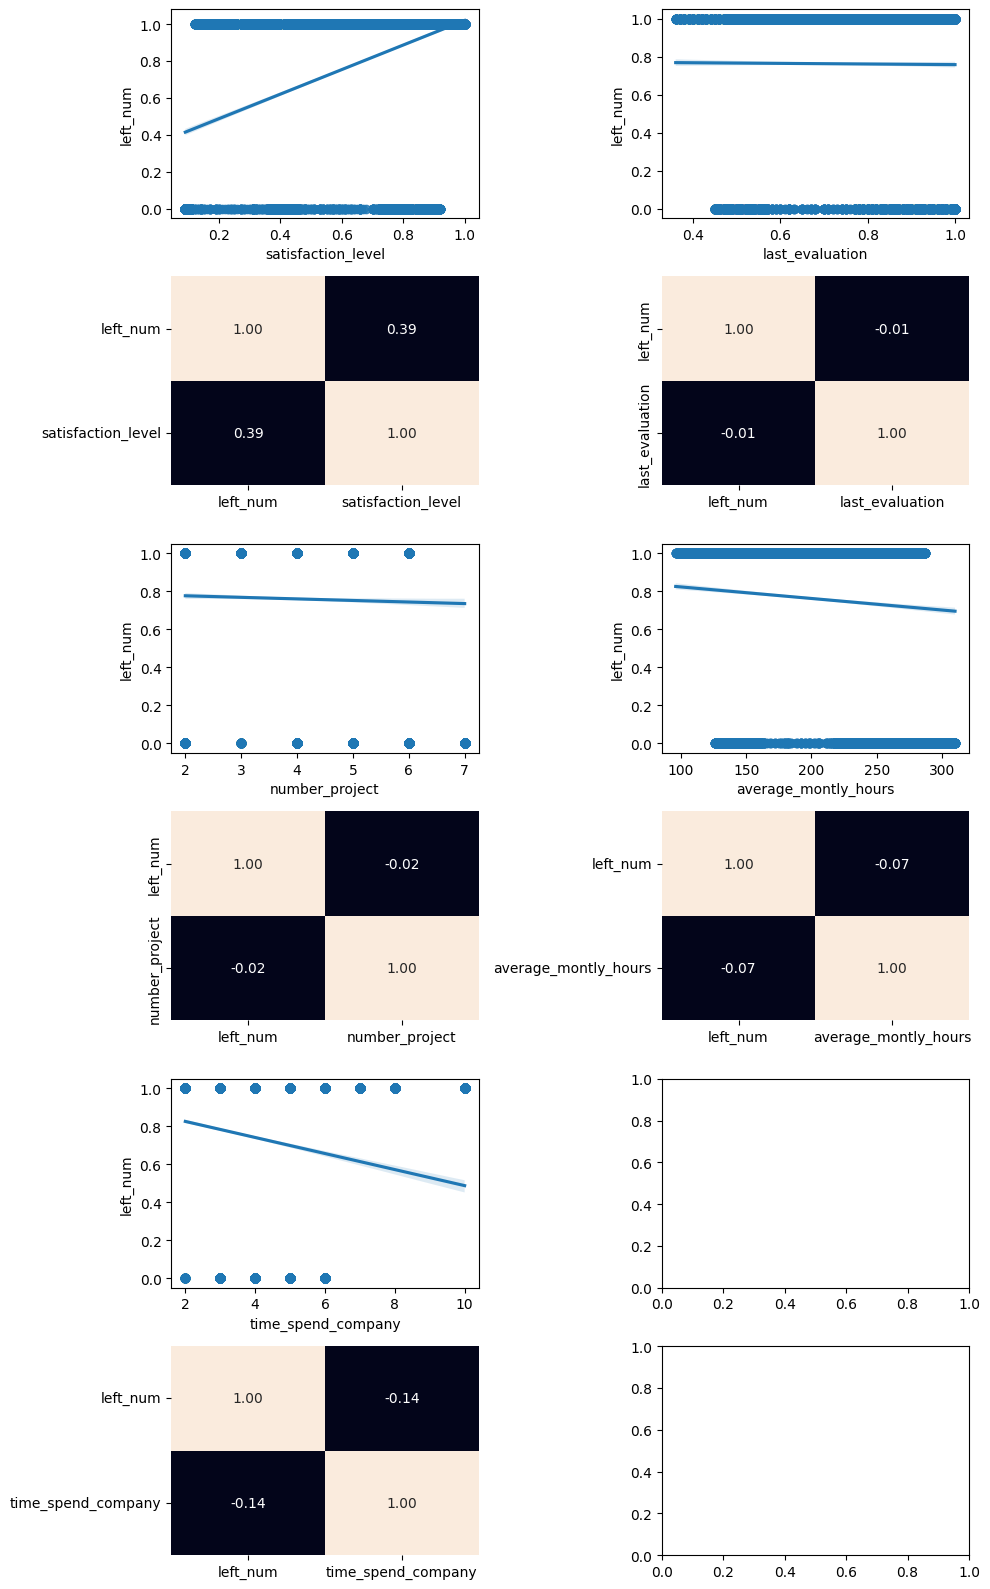

In [13]:
df['left_num'] = pd.factorize(df['left'])[0]

from utils import analisis_numerico_numerico_multivariante

analisis_numerico_numerico_multivariante(df,'left_num')

In [14]:
from utils import columnas_categoricas
col_num_cat = ['Department','salary','Work_accident','left','promotion_last_5years']
col_cat = columnas_categoricas(df,col_num_cat)

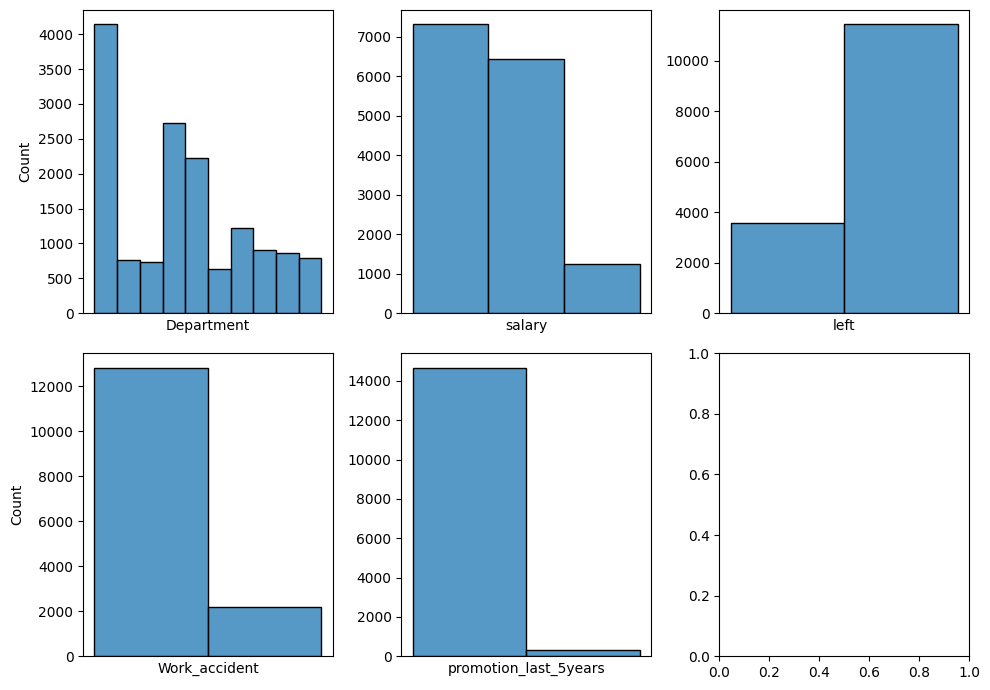

In [15]:
from utils import analisis_categorico_categorico
analisis_categorico_categorico(df)

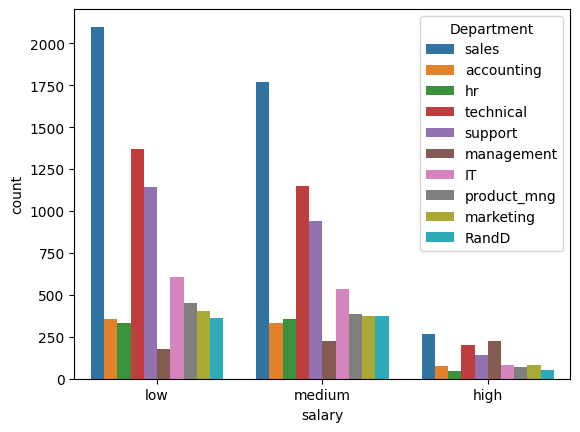

In [16]:
#Análisis categórico - multivariante

from utils import analisis_categorico_categorico_multivariante

analisis_categorico_categorico_multivariante(df,'salary','Department') 


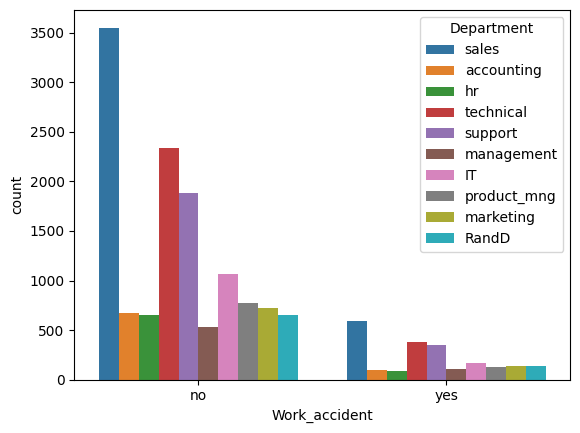

In [17]:
from utils import analisis_categorico_categorico_multivariante

analisis_categorico_categorico_multivariante(df,'Work_accident','Department') 

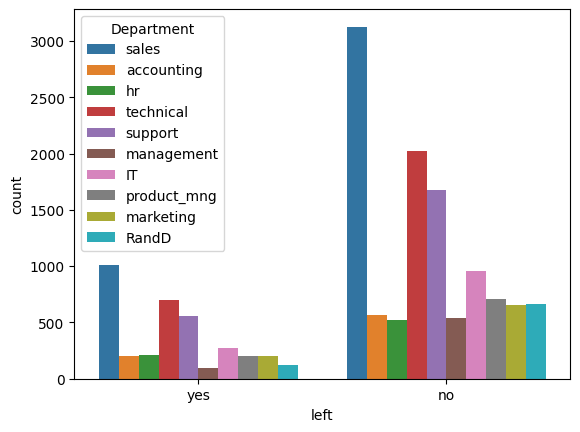

In [18]:
from utils import analisis_categorico_categorico_multivariante

analisis_categorico_categorico_multivariante(df,'left','Department') 

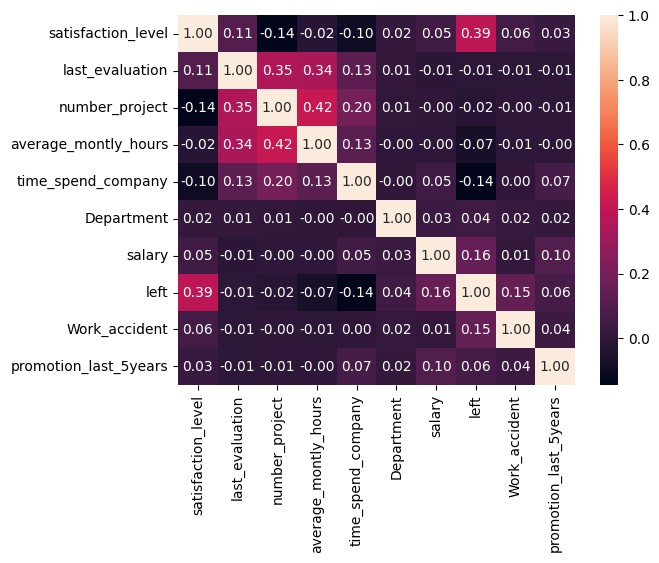

In [19]:

from utils import analisis_numerico_categorico

analisis_numerico_categorico(df, 'left_num')

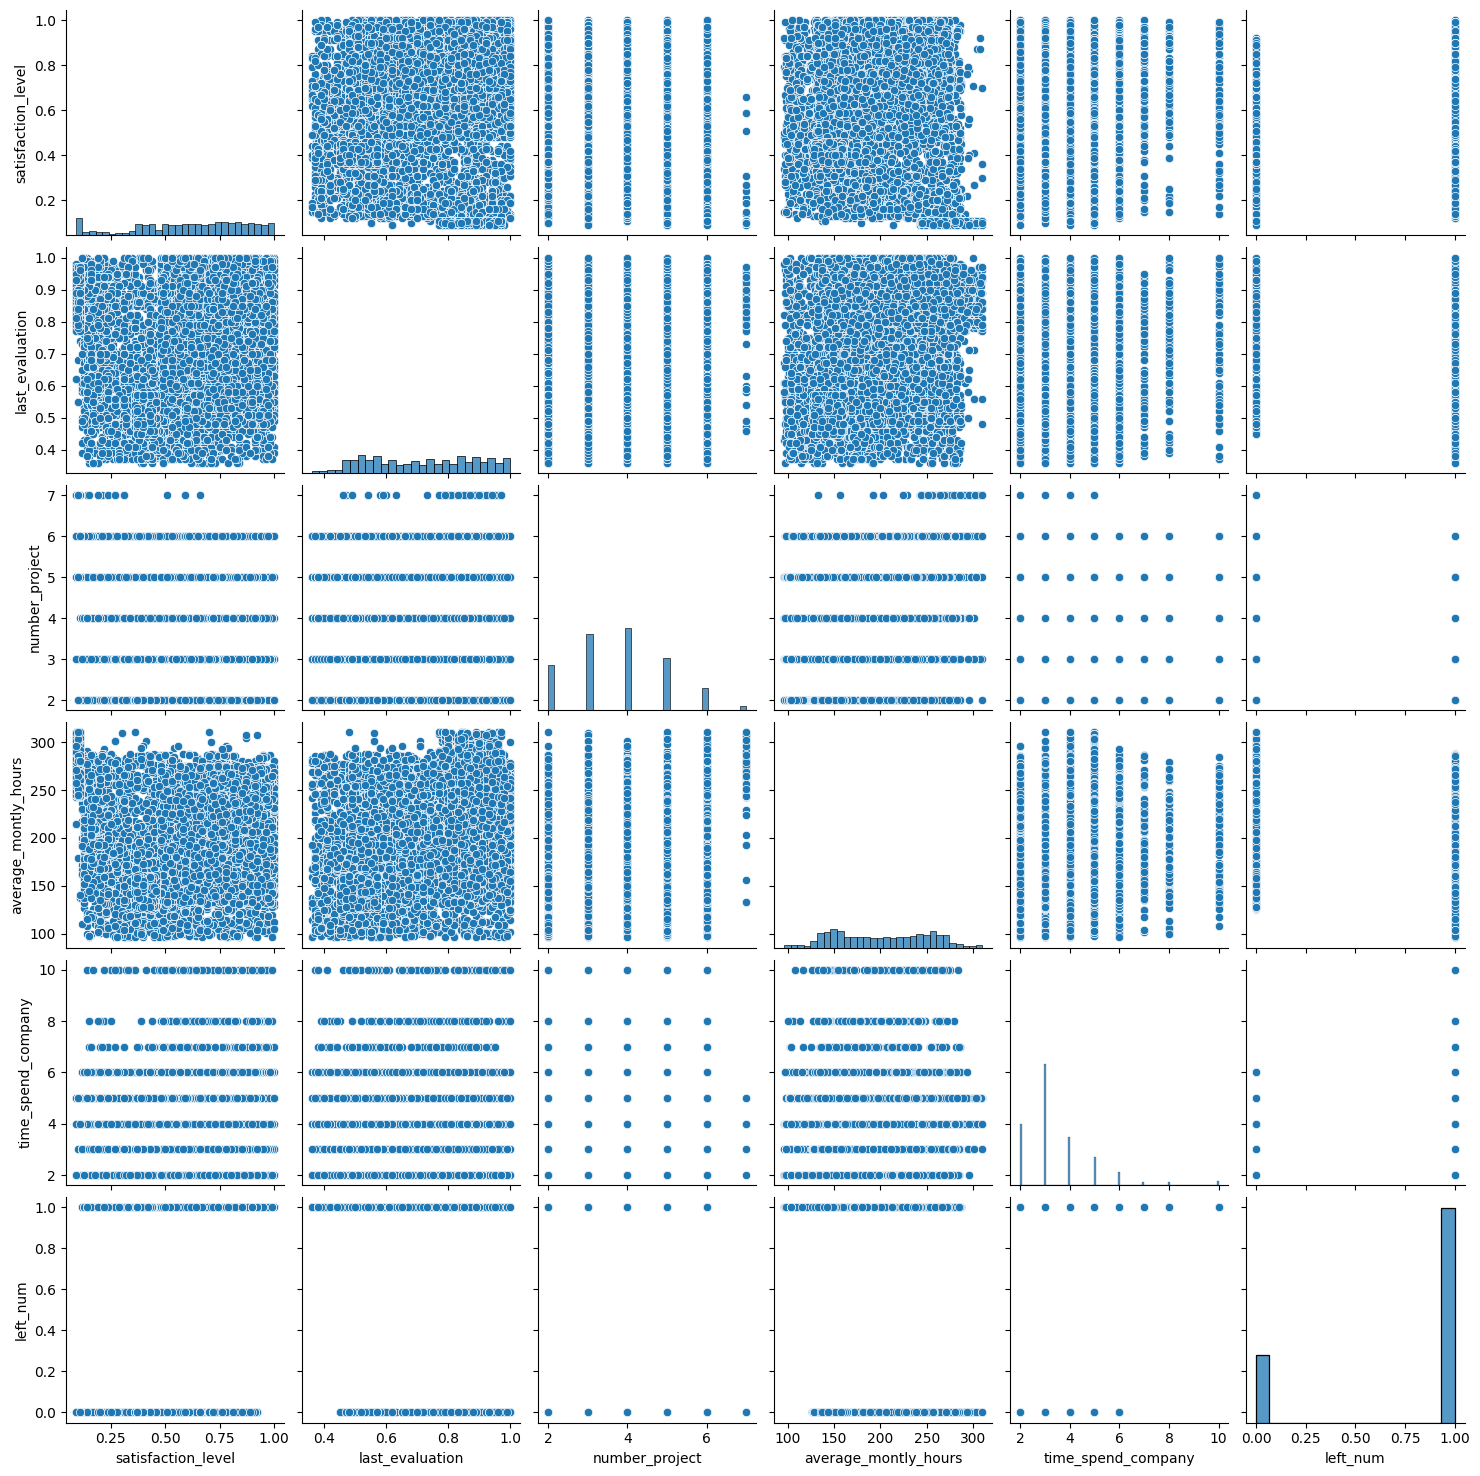

In [20]:
import seaborn as sns
sns.pairplot(data=df)

In [21]:
from utils import analisis_ric
analisis_ric(df=df)

columna: satisfaction_level limites superior 1.39 e inferior -0.12999999999999995
columna: last_evaluation limites superior 1.335 e inferior 0.09500000000000014
columna: number_project limites superior 8.0 e inferior 0.0
columna: average_montly_hours limites superior 378.5 e inferior 22.5
columna: time_spend_company limites superior 5.5 e inferior 1.5
columna: left_num limites superior 1.0 e inferior 1.0


In [22]:
df = df[(df['satisfaction_level'] >= 0) & (df['satisfaction_level'] <= 1.39)]
df = df[(df['last_evaluation'] >= 0.095) & (df['last_evaluation'] <= 1.335)]
df = df[(df['number_project'] >= 0) & (df['number_project'] <= 8.0)]
df = df[(df['average_montly_hours'] >= 22.5) & (df['average_montly_hours'] <= 378.5)]
df = df[(df['time_spend_company'] >= 1.5) & (df['time_spend_company'] <= 5.5)]
#df = df[(df['Department'] >= 0) & (df['Department'] <= 15)]

In [23]:
df.shape

(13717, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13717 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     13717 non-null  float64
 1   last_evaluation        13717 non-null  float64
 2   number_project         13717 non-null  int64  
 3   average_montly_hours   13717 non-null  int64  
 4   time_spend_company     13717 non-null  int64  
 5   Department             13717 non-null  object 
 6   salary                 13717 non-null  object 
 7   left                   13717 non-null  object 
 8   Work_accident          13717 non-null  object 
 9   promotion_last_5years  13717 non-null  object 
 10  left_num               13717 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.3+ MB


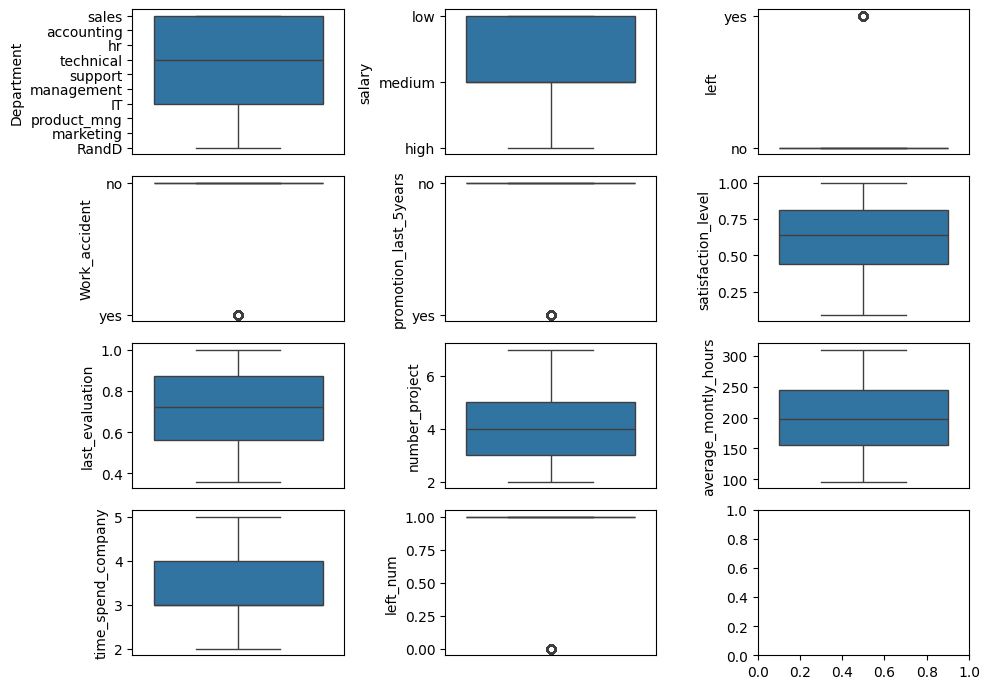

In [25]:
from utils import analisis_boxplot

analisis_boxplot(df, 'left_num')

In [26]:
df = df.drop('left_num', axis=1)

In [27]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Department,salary,left,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,sales,low,yes,no,no
2,0.11,0.88,7,272,4,sales,medium,yes,no,no
3,0.72,0.87,5,223,5,sales,low,yes,no,no
4,0.37,0.52,2,159,3,sales,low,yes,no,no
5,0.41,0.50,2,153,3,sales,low,yes,no,no
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,support,low,yes,no,no
14995,0.37,0.48,2,160,3,support,low,yes,no,no
14996,0.37,0.53,2,143,3,support,low,yes,no,no
14997,0.11,0.96,6,280,4,support,low,yes,no,no


In [28]:
df.Department.unique()


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [29]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [30]:
dic_dep = {'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3,'support': 4, 'management': 5, 'IT': 6, 'product_mng': 7,'marketing': 8, 'RandD': 9}
dic_sal = {'low': 0, 'medium': 1, 'high': 2}
dic_Work_accident = {'yes': 1, 'no': 0}
dic_promotion_last_5years = {'yes': 1, 'no': 0}
dic_left = {'yes': 1, 'no': 0}

In [31]:
import json

with open('../data/processed/dic_dep.json','w', encoding='utf-8') as archivo:
    json.dump(dic_dep,archivo,ensure_ascii=False,indent=4)
with open('../data/processed/dic_sal.json','w', encoding='utf-8') as archivo:
    json.dump(dic_sal,archivo,ensure_ascii=False,indent=4)
with open('../data/processed/dic_Work_accident.json','w', encoding='utf-8') as archivo:
    json.dump(dic_Work_accident,archivo,ensure_ascii=False,indent=4)
with open('../data/processed/dic_promotion_last_5years.json','w', encoding='utf-8') as archivo:
    json.dump(dic_promotion_last_5years,archivo,ensure_ascii=False,indent=4)
with open('../data/processed/dic_left.json','w', encoding='utf-8') as archivo:
    json.dump(dic_left,archivo,ensure_ascii=False,indent=4)

In [32]:
df["Department"].replace(dic_dep, inplace=True)
df["salary"].replace(dic_sal, inplace=True)
df["Work_accident"].replace(dic_Work_accident, inplace=True)
df["promotion_last_5years"].replace(dic_promotion_last_5years, inplace=True)
df["left"].replace(dic_left, inplace=True)

/tmp/ipykernel_727/2882627730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Department"].replace(dic_dep, inplace=True)
/tmp/ipykernel_727/2882627730.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Department"].replace(dic_dep, inplace=True)
/tmp/ipykernel_727/2882627730.py:2: Futu

In [33]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Department,salary,left,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,4,0,1,0,0
14995,0.37,0.48,2,160,3,4,0,1,0,0
14996,0.37,0.53,2,143,3,4,0,1,0,0
14997,0.11,0.96,6,280,4,4,0,1,0,0


In [34]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders for categorical columns
#categorical_columns = ['Department', 'salary', 'Work_accident', 'left', 'promotion_last_5years']
#label_encoders = {}


#for column in categorical_columns:
#    label_encoders[column] = LabelEncoder()
#    df[column] = label_encoders[column].fit_transform(df[column])

# Now proceed with train test split
X = df.drop('left', axis=1)
Y = df['left']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [35]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(2744,))

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


print(f'accuracy score es {accuracy_score(Y_test, Y_pred)}')
print(f'F1 score es {f1_score(Y_test, Y_pred)}')



accuracy score es 0.9897959183673469
F1 score es 0.9790104947526237


In [37]:
print(model.feature_importances_)
print(X_train.columns)

[0.3661254  0.1014428  0.18945788 0.12948042 0.18981856 0.01129583
 0.00685094 0.00483918 0.000689  ]
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Department', 'salary',
       'Work_accident', 'promotion_last_5years'],
      dtype='object')


In [38]:
#NOse hace una grilla porque no sube el accuracy_score 0.9897934935410927

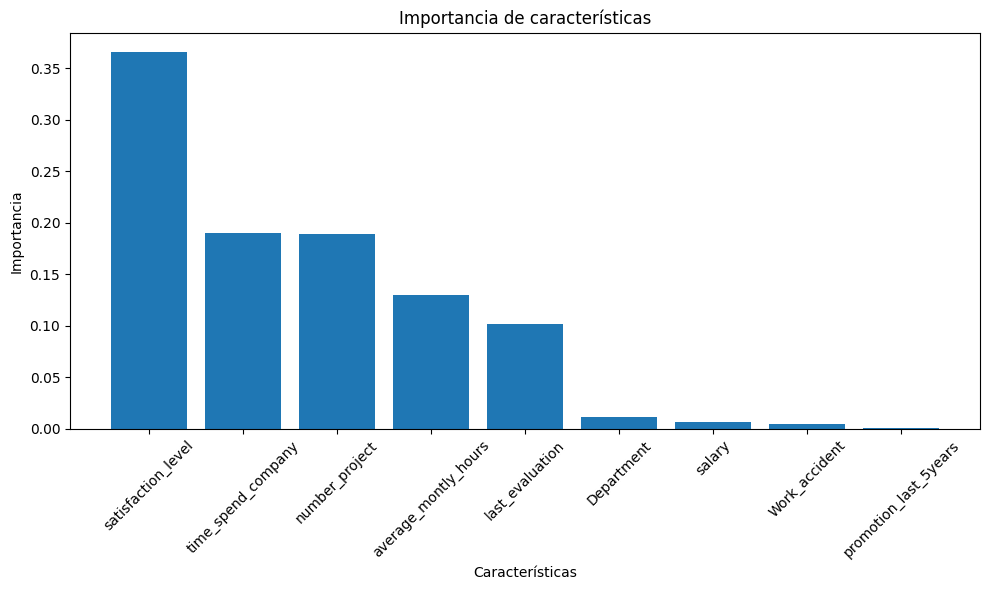

In [39]:
#Gráfico de variables según importancia
importancia = pd.DataFrame({
    'caracteristica': X_train.columns,
    'importancia': model.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importancia['caracteristica'], importancia['importancia'])
plt.xticks(rotation=45)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

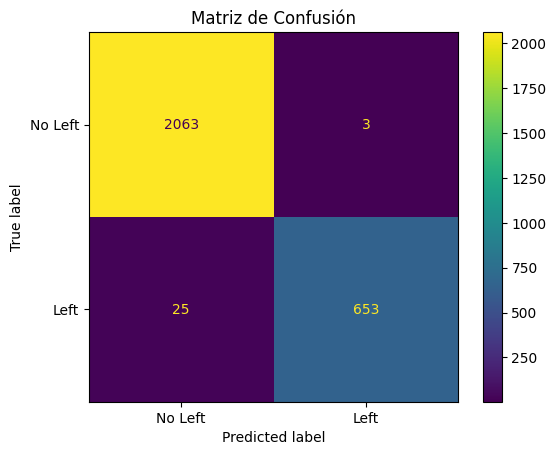

Matriz de Confusión:
Verdaderos Negativos: 2063
Falsos Positivos: 3
Falsos Negativos: 25
Verdaderos Positivos: 653


In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Crear la visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=['No Left', 'Left'])

# Mostrar la matriz
plt.figure(figsize=(8, 6))
disp.plot()
plt.title('Matriz de Confusión')
plt.show()

# Imprimir valores
print("Matriz de Confusión:")
print(f"Verdaderos Negativos: {cm[0,0]}")
print(f"Falsos Positivos: {cm[0,1]}")
print(f"Falsos Negativos: {cm[1,0]}")
print(f"Verdaderos Positivos: {cm[1,1]}")

In [41]:
from pickle import dump
dump(model,open('../models/random_forest_classifier_2.sav','wb'))